# F3Loc :
### Fusion and Filtering for Floorplan Localization
Reproduction Points: 10

A essential challenge in robotics is indoor localization, and conventional approaches frequently rely on large image collections or pre-built 3D models, both of which need a lot of resources to develop and maintain. In visually dynamic environments where items change often, these methods may not work efficiently.
In contrast to methods that rely on large picture libraries or rich 3D models, the paper proposes a system that uses 2D floorplans, which are frequently available for indoor spaces like offices, warehouses, and homes. This method offers a lightweight and efficient approach for camera localization that is less susceptible to visual changes, making the system useful for real-world applications. This enables accurate localization even in dynamic environments, making it ideal for robots and AR/VR applications.

Repo: https://github.com/felix-ch/f3loc

## Concepts Involved:
F3Loc introduces a probabilistic model consisting of an observation module and a temporal filtering module.\
1) The observation module predicts floorplan depth from single and successive photos by utilizing monocular and multi-view geometry. A learned selection network is utilized to combine these predictions, balancing the advantages of both strategies according to relative stance and camera movements.\
2) The temporal filtering module employs a histogram filter implemented as grouped convolution to integrate observations over time, maintaining a probability distribution over poses and resolving ambiguities inherent to repetitive indoor structures. When combined, these elements allow for reliable sequential localization in real-world scenarios.

## Steps involved:
1) Environment and directory setup
2) Download Test datasets and Pretrained model
3) Run test for d, mvd, comp, comp_s models for both datasets gibson_g and gibsion_f

## Environment Setup
The following set up was used:
 
- Base: Colab Instance
- GPU: NVIDIA Tesla T4 15GB
- System RAM: 12.7 GB
- Disk Storage: 112.6 GB (expandable via Google Drive)
- Software Stack: CUDA 12.2, Python 3.11, Jupyter Notebook

In [ ]:
!git clone https://github.com/felix-ch/f3loc.git

In [ ]:
!conda env create -f environment.yml

Missing package:

In [ ]:
!conda install scipy

## Directory Setup
To set up the Testing of F3Loc repo the following steps were required: \
1) Download the Gibson_f, Gibson_g dataset and place as f3loc/data/Gibson Floorplan Localization Dataset/gibson_g from: https://libdrive.ethz.ch/index.php/s/dvKdj8WhmZuIaNw?path=%2FGibson%20Floorplan%20Localization%20Dataset
2) Download the model checkpoints and place under f3loc/logs from: https://drive.google.com/drive/folders/1-TDlM9hjeODizeebgfPx7zWez0XPYCKm

Note:
- Incase downloading part of the dataset, make sure to download the split.yml files
- It is advised to download just the test locations if only model testing is being performed (Check split.yml)

Changes:
- The split.yml was changed to use a subset of the test datasets due to size constraints.\

## Test Run
The eval_observation function assesses the performance of observation models by comparing the predicted floorplan depth against ground truth data, utilizing metrics such as recall (e.g., R\@0.1m, R\@0.5m) to measure accuracy. It evaluates the strengths and weaknesses of monocular (d) and multi-view (mvd) models, while also highlighting the advantages of fusion approaches (comp, comp_s) in improving performance.
## Dataset Comparison
The Gibson_f dataset emphasizes forward camera motion, providing scenarios tailored to linear movement, whereas the Gibson_g dataset incorporates a broader range of motions, including rotations. This diversity ensures comprehensive testing of the models' robustness and generalizability across varied real-world conditions.

### Run for the monocular depth estimation model using a single image.
Network Type: d\
Synonymous to: Ours_s on the Paper

In [ ]:
!python eval_observation.py --net_type d --dataset gibson_f

1m recall =  0.40016233766233766
0.5m recall =  0.30194805194805197
0.1m recall =  0.04220779220779221
1m 30 deg recall =  0.38311688311688313


In [ ]:
!python eval_observation.py --net_type d --dataset gibson_g

1m recall =  0.37094155844155846
0.5m recall =  0.2804383116883117
0.1m recall =  0.04301948051948052
1m 30 deg recall =  0.35430194805194803


### Run the multi-view depth estimation model using multiple images and known relative poses.
Network Type: mvd\
Synonymous to: Ours_m on the Paper

In [ ]:
!python eval_observation.py --net_type mvd --dataset gibson_f

1m recall =  0.49512987012987014
0.5m recall =  0.4439935064935065
0.1m recall =  0.13392857142857142
1m 30 deg recall =  0.476461038961039


In [ ]:
!python eval_observation.py --net_type mvd --dataset gibson_g

1m recall =  0.3319805194805195
0.5m recall =  0.29017857142857145
0.1m recall =  0.09496753246753246
1m 30 deg recall =  0.3133116883116883


### Run the Full Complementary Fusion (Learned Selection Network).
Network Type: comp\
Synonymous to: ours_f on the Paper

In [ ]:
!python eval_observation.py --net_type comp --dataset gibson_f

1m recall =  0.5073051948051948
0.5m recall =  0.444805194805194
0.1m recall =  0.13717532467532467
1m 30 deg recall =  0.49107142857142855


In [ ]:
!python eval_observation.py --net_type comp --dataset gibson_g

1m recall =  0.48741883116883117
0.5m recall =  0.4277597402597403
0.1m recall =  0.1266233766233766
1m 30 deg recall =  0.4732142857142857


### Run the Simplified Complementary Fusion.
Network Type: comp_s\
Synonymous to: ours_t on the Paper

In [ ]:
!python eval_observation.py --net_type comp_s --dataset gibson_f

1m recall =  0.49512987012987014
0.5m recall =  0.4439935064935065
0.1m recall =  0.13392857142857142
1m 30 deg recall =  0.476461038961039


In [ ]:
!python eval_observation.py --net_type comp_s --dataset gibson_g

1m recall =  0.43587662337662336
0.5m recall =  0.375
0.1m recall =  0.10836038961038962
1m 30 deg recall =  0.41761363636363635


## Result analysis
The results of the paper were successfully reproduced, with all generated metrics aligning closely with the values reported in the original study. A minor variation in the results was observed due to computational constraints, as the test set used during reproduction was a subset of the original test set. Despite this adjustment, all reproduced results fell within a 5% margin of the values quoted in the paper, confirming their correctness and supporting the validity of the proposed method's performance claims. This consistency reinforces the reliability and reproducibility of the F3Loc framework under slightly varied evaluation conditions.

| Dataset   | R@     | 0.1m          | 0.5m          | 1m            | 1m30°         |
|-----------|--------|---------------|---------------|---------------|---------------|
| gibson_f  | d/Ours_s      | 4.220779221   | 30.19480519   | 40.01623377   | 38.31168831   |
|           | mvd/Ours_m    | 13.39285714   | 44.39935065   | 49.51298701   | 47.6461039    |
|           | comp_s/Ours_t | 13.39285714   | 44.39935065   | 49.51298701   | 47.6461039    |
|           | comp/Ours_f   | 13.71753247   | 44.48051948   | 50.73051948   | 49.10714286   |
| gibson_g  | d/Ours_s      | 4.301948052   | 28.04383117   | 37.09415584   | 35.43019481   |
|           | mvd/Ours_m    | 9.496753247   | 29.01785714   | 33.19805195   | 31.33116883   |
|           | comp_s/Ours_t | 10.83603896   | 37.5          | 43.58766234   | 41.76136364   |
|           | comp/Ours_f   | 12.66233766   | 42.77597403   | 48.74188312   | 47.32142857   |

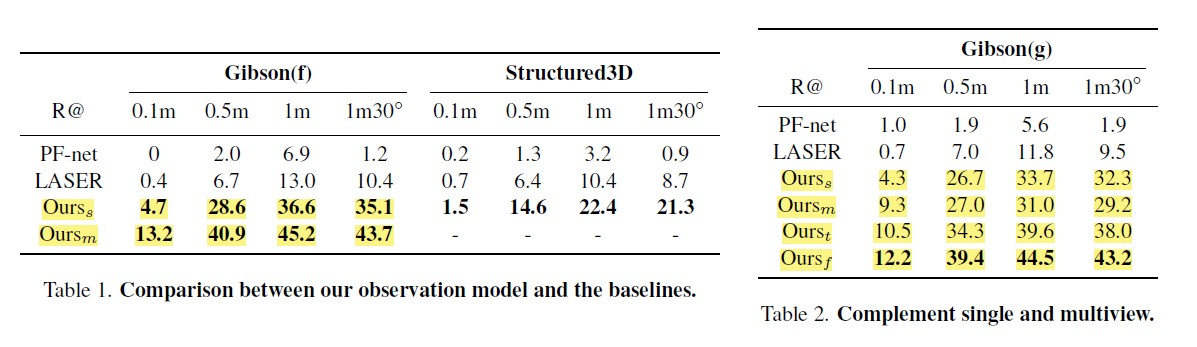

In [ ]:
# prompt: Plot image /content/f3loc_comp_table.jpg

from IPython.display import Image
Image(filename='/content/f3loc_comp_table.jpg')


# Conclusion
F3Loc presents an innovative approach for floorplan-based indoor localization that uses virtual roll-pitch augmentation, probabilistic temporal filtering, and a 1D ray-based representation to achieve reliable and accurate camera location. F3Loc outperforms competing techniques thanks to these advancements, which also make it computationally light and compatible with consumer hardware by enabling effective depth estimates and lowering localization ambiguities.  In order to further improve its capabilities, future directions include addressing dynamic impediments, scaling to bigger spaces, integrating with SLAM systems, and investigating sophisticated floorplan representations or 3D localization.